# Import

In [2]:
%load_ext autoreload
%autoreload 2

import streamlit as st
import pandas as pd
import numpy as np
import networkx as nx
import time
from streamlit import session_state
import copy
import plotly.express as px
import time
from utils import *


%matplotlib inline 
%config Completer.use_jedi = True

from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Algo

In [3]:
File = {'SheetMapName' : 'map', 'uploaded_file' : None, 'DistFactor' : [2,5]}
algo = load_data(File)
df = indiv_init(algo, algo.pop)

Init algo namespace
sheet_names ['confs', 'map', 'mapP2', 'map s2', 'map (2)', 'map (3)', 'map T', 'map P2T', 'map T22', 'map T3', 'map Tbig1']
{'C': ['C0', 'C1', 'C2', 'C3', 'C4'], 'P': ['P0'], 'E': ['E0', 'E1'], 'T': []}
Update_Algo
Graph with 8 nodes and 13 edges


In [4]:
algo.confs

,Categorie,Composants,Type,Masse,Cout,Name,Actif,a,b,c
0,Pompe,Pompe 1,Single,136.0,2.50,Pa,1.0,-0.000516,-0.0154,4.87
1,Pompe,Pompe 2,Dual,130.0,3.50,Pb,1.0,-0.000516,-0.0154,4.87
2,Pompe,Pompe 3,Brushless,330.0,24.00,Pc,1.0,-0.000661,-0.0286,12.10
3,EV,EV_A,Electrovanne,110.0,6.00,Ea,1.0,0.000764,NaN,NaN
4,EV,EV_B,Electrovanne,150.0,8.00,Eb,NaN,0.000764,NaN,NaN
5,Tuyau,Tuyau 1,4 mm,46.0,0.35,4,1.0,0.000235,NaN,NaN
6,Tuyau,Tuyau 2,8 mm,83.0,0.60,8,1.0,0.000720,NaN,NaN
7,Special,Y,NaN,10.0,0.20,Y,1.0,0.000000,NaN,NaN
8,Reservoir,1 Réservoir,NaN,600.0,25.00,Ra,1.0,NaN,NaN,NaN
9,Nozzle,Fixed,NaN,NaN,NaN,F,1.0,0.036000,NaN,NaN


In [5]:
ColexportDefault = ['ID','dist','Debit','Masse','Cout','fitness','Epoch',
                        'Alive','parent','ICount','Name_txt','PressionList','DebitList','deadInfo']
df[ColexportDefault]

,ID,dist,Debit,Masse,Cout,fitness,Epoch,Alive,parent,ICount,Name_txt,PressionList,DebitList,deadInfo
0,0,16.4,55.8,2065.0,59.7,16.4,0,True,[],"{'Pa': 2, 'Pb': 0, 'Pc': 0, 'EV': 4, 'Y': 0, '...","E0-C0,E1-C1,E1-C2,E1-C3,E1-C4,P0-E0,P0-E1","{'C0': 4.5, 'C1': 4.4, 'C2': 4.4, 'C3': 4.5, '...","{'C0': 11.2, 'C1': 11.1, 'C2': 11.1, 'C3': 11....",
1,1,23.5,55.1,2503.5,68.2,23.5,0,True,[],"{'Pa': 2, 'Pb': 0, 'Pc': 0, 'EV': 5, 'Y': 0, '...","E0-C2,E0-C3,E0-C4,E1-C0,E1-C1,P0-E0,P0-E1","{'C0': 4.4, 'C1': 4.4, 'C2': 4.4, 'C3': 4.3, '...","{'C0': 11.0, 'C1': 11.1, 'C2': 11.1, 'C3': 11....",
2,2,16.0,55.6,2020.6,63.1,16.0,0,True,[],"{'Pa': 1, 'Pb': 0, 'Pc': 0, 'EV': 5, 'Y': 0, '...","E1-C0,E1-C1,E1-C2,E1-C3,E1-C4,P0-E1","{'C0': 4.4, 'C1': 4.4, 'C2': 4.4, 'C3': 4.5, '...","{'C0': 11.0, 'C1': 11.1, 'C2': 11.1, 'C3': 11....",
3,3,19.9,55.3,2229.2,61.0,19.9,0,True,[],"{'Pa': 2, 'Pb': 0, 'Pc': 0, 'EV': 4, 'Y': 0, '...","E0-C1,E0-C2,E0-C3,E0-C4,E1-C0,P0-E0,P0-E1","{'C0': 4.5, 'C1': 4.4, 'C2': 4.4, 'C3': 4.3, '...","{'C0': 11.2, 'C1': 11.1, 'C2': 11.1, 'C3': 11....",
4,4,23.5,55.1,2503.5,68.2,23.5,0,True,[],"{'Pa': 2, 'Pb': 0, 'Pc': 0, 'EV': 5, 'Y': 0, '...","E0-C1,E0-C3,E0-C4,E1-C0,E1-C2,P0-E0,P0-E1","{'C0': 4.4, 'C1': 4.4, 'C2': 4.4, 'C3': 4.3, '...","{'C0': 11.0, 'C1': 11.1, 'C2': 11.1, 'C3': 11....",
5,5,16.4,55.3,2175.0,65.7,16.4,0,True,[],"{'Pa': 2, 'Pb': 0, 'Pc': 0, 'EV': 5, 'Y': 0, '...","E0-C0,E0-C1,E0-C4,E1-C2,E1-C3,P0-E0,P0-E1","{'C0': 4.4, 'C1': 4.4, 'C2': 4.4, 'C3': 4.5, '...","{'C0': 11.0, 'C1': 11.1, 'C2': 11.1, 'C3': 11....",
6,6,16.4,55.7,2065.0,59.7,16.4,0,True,[],"{'Pa': 2, 'Pb': 0, 'Pc': 0, 'EV': 4, 'Y': 0, '...","E0-C1,E1-C0,E1-C2,E1-C3,E1-C4,P0-E0,P0-E1","{'C0': 4.4, 'C1': 4.5, 'C2': 4.4, 'C3': 4.5, '...","{'C0': 11.0, 'C1': 11.2, 'C2': 11.1, 'C3': 11....",
7,7,12.8,55.5,1900.8,58.5,12.8,0,True,[],"{'Pa': 2, 'Pb': 0, 'Pc': 0, 'EV': 4, 'Y': 0, '...","E0-C0,E0-C1,E0-C2,E0-C3,E1-C4,P0-E0,P0-E1","{'C0': 4.4, 'C1': 4.4, 'C2': 4.4, 'C3': 4.3, '...","{'C0': 11.0, 'C1': 11.1, 'C2': 11.1, 'C3': 11....",
8,8,19.9,55.2,2229.2,61.0,19.9,0,True,[],"{'Pa': 2, 'Pb': 0, 'Pc': 0, 'EV': 4, 'Y': 0, '...","E0-C0,E0-C1,E0-C3,E0-C4,E1-C2,P0-E0,P0-E1","{'C0': 4.4, 'C1': 4.4, 'C2': 4.5, 'C3': 4.3, '...","{'C0': 11.0, 'C1': 11.1, 'C2': 11.2, 'C3': 11....",
9,9,16.4,55.3,2175.0,65.7,16.4,0,True,[],"{'Pa': 2, 'Pb': 0, 'Pc': 0, 'EV': 5, 'Y': 0, '...","E0-C1,E0-C2,E0-C4,E1-C0,E1-C3,P0-E0,P0-E1","{'C0': 4.4, 'C1': 4.4, 'C2': 4.4, 'C3': 4.5, '...","{'C0': 11.0, 'C1': 11.1, 'C2': 11.1, 'C3': 11....",


# indiv

In [6]:
indiv = df.iloc[0].to_dict()

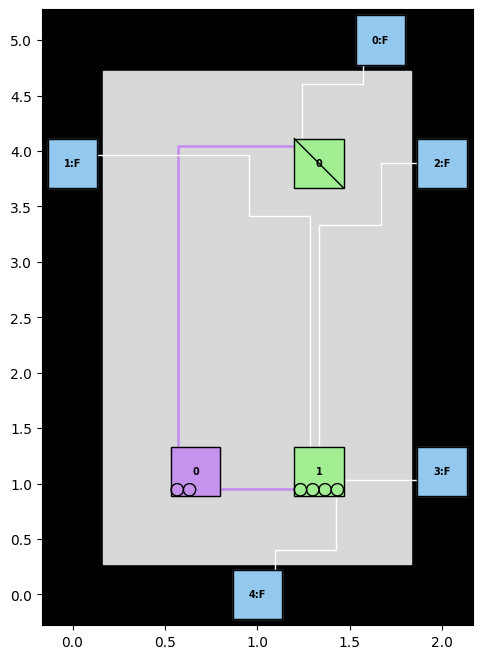

In [7]:
fig = Plot_indiv(algo,indiv)